## Data Exploration

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(style="whitegrid")
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score, f1_score, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import resample
from sklearn import linear_model
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures


In [46]:
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

In [47]:
df = pd.read_csv('covtype.csv')

In [48]:
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


In [49]:
df.corr()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
Elevation,1.000000,0.015735,-0.242697,0.306229,0.093306,0.365559,0.112179,0.205887,0.059148,0.148022,0.131838,0.238164,0.066550,-0.619374,-0.204512,-0.187677,-0.182463,-0.183521,-0.150376,-0.214606,-0.002252,-0.003021,-0.060915,-0.428746,-0.134227,-0.118905,-0.043984,-0.080825,-0.007153,-0.059446,-0.111028,-0.081811,0.033144,-0.043128,0.017557,0.158959,0.124356,0.053582,0.028753,-0.016657,0.035254,-0.029270,0.074327,-0.026667,0.070405,0.167077,0.070633,0.011731,0.083005,0.021107,0.035433,0.217179,0.193595,0.212612,-0.269554
Aspect,0.015735,1.000000,0.078728,0.017376,0.070305,0.025121,-0.579273,0.336103,0.646944,-0.109172,-0.140123,0.055988,0.074904,0.082687,-0.007574,-0.005649,-0.002730,0.017212,0.008938,0.010766,-0.005052,-0.003366,-0.020800,0.049835,-0.064344,-0.070209,0.054544,0.007597,-0.002660,0.007846,-0.000168,-0.028353,-0.003635,-0.029440,0.032998,0.021578,0.013676,0.018164,-0.003265,-0.010661,0.011328,0.027535,-0.062181,-0.028922,0.001763,0.056233,0.019163,0.010861,-0.021991,0.002281,-0.020398,0.017706,0.008294,-0.005866,0.017080
Slope,-0.242697,0.078728,1.000000,-0.010607,0.274976,-0.215914,-0.327199,-0.526911,-0.175854,-0.185662,-0.234576,-0.036253,0.125663,0.255503,0.107847,-0.018553,0.125497,0.131847,0.072311,0.003673,-0.015661,-0.023359,-0.032752,0.244037,-0.050894,-0.169300,0.192423,0.000228,0.001081,-0.034791,-0.040208,-0.045851,-0.083743,-0.077582,-0.025461,-0.053396,-0.207397,0.082434,0.026364,-0.021449,0.043695,0.067052,-0.082941,0.075864,-0.034610,-0.133504,0.208942,-0.011002,-0.022228,0.002918,0.007848,-0.072208,0.093602,0.025637,0.148285
Horizontal_Distance_To_Hydrology,0.306229,0.017376,-0.010607,1.000000,0.606236,0.072030,-0.027088,0.046790,0.052330,0.051874,-0.097124,0.055726,0.122028,-0.100433,-0.035096,-0.011569,-0.041211,-0.049071,-0.009370,-0.012916,0.004751,-0.000795,-0.021935,-0.071653,0.001399,0.014628,-0.002032,-0.038478,-0.002667,-0.067448,-0.071435,-0.013340,-0.043236,-0.078088,-0.039953,-0.051424,-0.132244,0.021927,0.016099,0.013408,0.052384,0.026210,-0.001025,-0.049960,0.073658,0.127217,0.101195,0.070268,-0.005231,0.033421,-0.006802,0.043031,0.031922,0.147020,-0.020317
Vertical_Distance_To_Hydrology,0.093306,0.070305,0.274976,0.606236,1.000000,-0.046372,-0.166333,-0.110957,0.034902,-0.069913,-0.180710,-0.008709,0.146839,0.077792,0.015275,0.008954,0.008863,0.025066,0.026772,0.046259,-0.008485,-0.012915,-0.028476,0.055154,-0.020870,-0.044526,0.083482,-0.024281,-0.001744,-0.050909,-0.054191,-0.031692,-0.055635,-0.076727,-0.026116,-0.075679,-0.180098,0.037066,-0.013471,-0.011212,0.067086,0.071672,-0.075860,-0.011901,0.033609,0.039762,0.167091,0.060274,-0.006092,0.012955,-0.007520,-0.008629,0.043859,0.179006,0.081664
Horizontal_Distance_To_Roadways,0.365559,0.025121,-0.215914,0.072030,-0.046372,1.000000,0.034349,0.189461,0.106119,0.331580,0.453913,-0.200411,-0.232933,-0.270349,-0.083585,-0.088026,-0.084988,-0.088524,-0.061607,-0.108328,0.020107,0.025805,-0.045813,-0.182955,-0.099293,0.054196,-0.054968,-0.033945,-0.003144,0.018083,-0.051825,-0.051243,0.068758,0.056595,-0.014890,0.046979,-0.007067,-0.032451,-0.034842,0.002521,0.003866,-0.032749,0.306324,0.077091,-0.058840,-0.089019,-0.082779,0.006390,-0.003000,0.007550,0.016313,0.079778,0.033762,0.016052,-0.153450

In [50]:
df.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,0.448865,0.051434,0.436074,0.063627,0.005217,0.012952,0.008301,0.021335,0.002749,0.011316,0.000181,0.000308,0.001974,0.056168,0.021359,0.051584,0.030001,0.001031,0.000005,0.004897,0.005890,0.003268,0.006921,0.015936,0.001442,0.057439,0.099399,0.036622,0.000816,0.004456,0.001869,0.001628,0.198356,0.051927,0.044175,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,0.497379,0.220882,0.495897,0.244087,0.072039,0.113066,0.090731,0.144499,0.052356,0.105775,0.013442,0.017550,0.044387,0.230245,0.144579,0.221186,0.170590,0.032092,0.002272,0.069804,0.076518,0.057077,0.082902,0.125228,0.037950,0.232681,0.299197,0.187833,0.028551,0.066605,0.043193,0.040318,0.398762,0.221879,0.205483,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

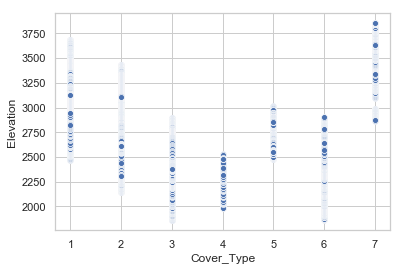

In [51]:
ax = sns.scatterplot(df['Cover_Type'], df['Elevation'], data=df);

In [52]:
df['Cover_Type'].value_counts()

2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: Cover_Type, dtype: int64

### Baseline Model with No Added Features

In [ ]:
# Create matrix of features
dfX = df.drop('Cover_Type', axis=1)

# Create target variable
dfy = df['Cover_Type']

feature_cols = X.columns

In [ ]:
# setting up testing and training sets
dfX_train, dfX_test, dfy_train, dfy_test = train_test_split(dfX, dfy, test_size=0.2, random_state=23)


In [ ]:
xg_clf = xgb.XGBClassifier(objective = "multi:softprob", 
                           colsample_bytree = 0.3,
                           num_class = 7,
                           eval_metric = "mlogloss",
                           learning_rate = 0.1,
                           alpha = 1, 
                           n_estimators = 100)

In [ ]:
xg_clf

In [ ]:
xg_clf.fit(dfX_train,dfy_train)

### Feature Engineering

#### Grouping by not stony, stony, very stony, bouldery, and rubbly

In [53]:
def stones(row):
    if row['Soil_Type1'] == 1:
        val= 3
    elif row['Soil_Type2'] == 1:
        val= 2
    elif row['Soil_Type3'] == 1:
        val=5
    elif row['Soil_Type4'] == 1:
        val=5
    elif row['Soil_Type5'] == 1:
        val=5
    elif row['Soil_Type6'] == 1:
        val=1
    elif row['Soil_Type7'] == 1:
        val=-1
    elif row['Soil_Type8'] == 1:
        val=-1
    elif row['Soil_Type9'] == 1:
        val=2
    elif row['Soil_Type10'] == 1:
        val=5
    elif row['Soil_Type11'] == 1:
        val=5
    elif row['Soil_Type12'] == 1:
        val=1
    elif row['Soil_Type13'] == 1:
        val=5
    elif row['Soil_Type14'] == 1:
        val=-1
    elif row['Soil_Type15'] == 1:
        val=2.5
    elif row['Soil_Type16'] == 1:
        val=-1
    elif row['Soil_Type17'] == 1:
        val=-1
    elif row['Soil_Type18'] == 1:
        val=2
    elif row['Soil_Type19'] == 1:
        val=-1
    elif row['Soil_Type20'] == 1:
        val=-1
    elif row['Soil_Type21'] == 1:
        val=-1
    elif row['Soil_Type22'] == 1:
        val=4
    elif row['Soil_Type23'] == 1:
        val=-1
    elif row['Soil_Type24'] == 1:
        val=3
    elif row['Soil_Type25'] == 1:
        val=3
    elif row['Soil_Type26'] == 1:
        val=2
    elif row['Soil_Type27'] == 1:
        val=3
    elif row['Soil_Type28'] == 1:
        val=3
    elif row['Soil_Type29'] == 1:
        val=3
    elif row['Soil_Type30'] == 1:
        val=3
    elif row['Soil_Type31'] == 1:
        val=3 
    elif row['Soil_Type32'] == 1:
        val=3
    elif row['Soil_Type33'] == 1:
        val=3
    elif row['Soil_Type34'] == 1:
        val=3
    elif row['Soil_Type35'] == 1:
        val=-1
    elif row['Soil_Type36'] == 1:
        val=3
    elif row['Soil_Type37'] == 1:
        val=3
    elif row['Soil_Type38'] == 1:
        val=3
    elif row['Soil_Type39'] == 1:
        val=3
    elif row['Soil_Type40'] == 1:
        val=3
    else:
        val=-1
    return val

In [54]:
df['Stony_Soil'] = df.apply(stones, axis=1)

In [55]:
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type,Stony_Soil
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5,3.0
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5,3.0
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1.0
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,3.0
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5,3.0


#### Grouping by unknown, acidic, and alkaline soil

In [56]:
def acidity(row):
    if row['Soil_Type1'] == 1:
        val= 1
    elif row['Soil_Type2'] == 1:
        val= 2
    elif row['Soil_Type3'] == 1:
        val=-1
    elif row['Soil_Type4'] == 1:
        val=3
    elif row['Soil_Type5'] == 1:
        val=-1
    elif row['Soil_Type6'] == 1:
        val=-1
    elif row['Soil_Type7'] == 1:
        val=2
    elif row['Soil_Type8'] == 1:
        val=3
    elif row['Soil_Type9'] == 1:
        val=-1
    elif row['Soil_Type10'] == 1:
        val=1
    elif row['Soil_Type11'] == 1:
        val=1
    elif row['Soil_Type12'] == 1:
        val=1
    elif row['Soil_Type13'] == 1:
        val=1
    elif row['Soil_Type14'] == 1:
        val=-1
    elif row['Soil_Type15'] == 1:
        val=-1
    elif row['Soil_Type16'] == 1:
        val=-1
    elif row['Soil_Type17'] == 1:
        val=-1
    elif row['Soil_Type18'] == 1:
        val=3
    elif row['Soil_Type19'] == 1:
        val=-1
    elif row['Soil_Type20'] == 1:
        val=-1
    elif row['Soil_Type21'] == 1:
        val=-1
    elif row['Soil_Type22'] == 1:
        val=1
    elif row['Soil_Type23'] == 1:
        val=1
    elif row['Soil_Type24'] == 1:
        val=1
    elif row['Soil_Type25'] == 1:
        val=1
    elif row['Soil_Type26'] == 1:
        val=3
    elif row['Soil_Type27'] == 1:
        val=1
    elif row['Soil_Type28'] == 1:
        val=1
    elif row['Soil_Type29'] == 1:
        val=1
    elif row['Soil_Type30'] == 1:
        val=1
    elif row['Soil_Type31'] == 1:
        val=1 
    elif row['Soil_Type32'] == 1:
        val=1
    elif row['Soil_Type33'] == 1:
        val=1
    elif row['Soil_Type34'] == 1:
        val=-1
    elif row['Soil_Type35'] == 1:
        val=-1
    elif row['Soil_Type36'] == 1:
        val=1
    elif row['Soil_Type37'] == 1:
        val=-1
    elif row['Soil_Type38'] == 1:
        val=1
    elif row['Soil_Type39'] == 1:
        val=1
    elif row['Soil_Type40'] == 1:
        val=1
    else:
        val=-1
    return val

In [57]:
df['Acidity_Soil'] = df.apply(acidity, axis=1)

In [58]:
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type,Stony_Soil,Acidity_Soil
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5,3.0,1
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5,3.0,1
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1.0,1
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,3.0,1
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5,3.0,1


#### Elevation Binned

In [59]:
bins = [1858, 2260, 2660, 3060, 3460, 3860]
labels = [1,2,3,4,5]
df['Elevation_Binned'] = pd.cut(df['Elevation'], bins, labels=labels)



In [60]:
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type,Stony_Soil,Acidity_Soil,Elevation_Binned
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5,3.0,1,2
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5,3.0,1,2
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1.0,1,3
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,3.0,1,3
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5,3.0,1,2


#### Hillshade Squared

In [61]:
df['Hillshade_9am_Squared'] = df['Hillshade_9am']**2

In [62]:
df['Hillshade_Noon_Squared'] = df['Hillshade_Noon']**2

In [63]:
df['Hillshade_3pm_Squared'] = df['Hillshade_3pm']**2

#### Logarithm of Elevation

In [64]:
df['log_Elevation'] = np.log(df['Elevation'])

#### Hillshade Mean

In [65]:
df['Hillshade_mean'] = (df['Hillshade_9am'] + df['Hillshade_Noon'] + df['Hillshade_3pm']) / 3



#### Bin distance from fire ignition point

In [66]:
bins = [0, 1200, 2200, 3200, 4200, 5200, 6200, 7200]
labels = [1,2,3,4,5,6,7]
df['Fire_Point_Binned'] = pd.cut(df['Horizontal_Distance_To_Fire_Points'], bins, labels=labels)



In [67]:
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type,Stony_Soil,Acidity_Soil,Elevation_Binned,Hillshade_9am_Squared,Hillshade_Noon_Squared,Hillshade_3pm_Squared,log_Elevation,Hillshade_mean,Fire_Point_Binned
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5,3.0,1,2,48841,53824,21904,7.861727,200.333333,7
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5,3.0,1,2,48400,55225,22801,7.859413,202.000000,7
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1.0,1,3,54756,56644,18225,7.938802,202.333333,6
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,3.0,1,3,56644,56644,14884,7.932003,199.333333,7
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5,3.0,1,2,48400,54756,22500,7.861342,201.333333,6


In [68]:
df.to_csv('Tree_Coverage_AllFeatures.csv')

## Train-Test Split

In [105]:
# Create matrix of features
X = df.drop('Cover_Type', axis=1)

# Create target variable
y = df['Cover_Type']

feature_cols = X.columns

In [106]:
# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)


### Feature Selection

In [69]:
df.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40

In [70]:
feature_columns = ['Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40', 'Stony_Soil', 'Acidity_Soil', 'Elevation_Binned',
       'Hillshade_9am_Squared', 'Hillshade_Noon_Squared',
       'Hillshade_3pm_Squared', 'log_Elevation', 'Hillshade_mean',
       'Fire_Point_Binned']



In [71]:
target = df['Cover_Type']
features = df[feature_columns]

In [74]:
df['Elevation_Binned'] = df['Elevation_Binned'].cat.codes

In [75]:
df['Fire_Point_Binned'] = df['Fire_Point_Binned'].cat.codes

In [78]:
# Create correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type,Stony_Soil,Acidity_Soil,Elevation_Binned,Hillshade_9am_Squared,Hillshade_Noon_Squared,Hillshade_3pm_Squared,log_Elevation,Hillshade_mean,Fire_Point_Binned
Elevation,NaN,0.015735,0.242697,0.306229,0.093306,0.365559,0.112179,0.205887,0.059148,0.148022,0.131838,0.238164,0.066550,0.619374,0.204512,0.187677,0.182463,0.183521,0.150376,0.214606,0.002252,0.003021,0.060915,0.428746,0.134227,0.118905,0.043984,0.080825,0.007153,0.059446,0.111028,0.081811,0.033144,0.043128,0.017557,0.158959,0.124356,0.053582,0.028753,0.016657,0.035254,0.029270,0.074327,0.026667,0.070405,0.167077,0.070633,0.011731,0.083005,0.021107,0.035433,0.217179,0.193595,0.212612,0.269554,0.166118,0.057145,0.926938,0.094733,0.199840,0.030149,0.997223,0.215153,0.135847
Aspect,NaN,NaN,0.078728,0.017376,0.070305,0.025121,0.579273,0.336103,0.646944,0.109172,0.140123,0.055988,0.074904,0.082687,0.007574,0.005649,0.002730,0.017212,0.008938,0.010766,0.005052,0.003366,0.020800,0.049835,0.064344,0.070209,0.054544,0.007597,0.002660,0.007846,0.000168,0.028353,0.003635,0.029440,0.032998,0.021578,0.013676,0.018164,0.003265,0.010661,0.011328,0.027535,0.062181,0.028922,0.001763,0.056233,0.019163,0.010861,0.021991,0.002281,0.020398,0.017706,0.008294,0.005866,0.017080,0.036495,0.007694,0.010256,0.580643,0.344537,0.680481,0.009880,0.366355,0.107031
Slope,NaN,NaN,NaN,0.010607,0.274976,0.215914,0.327199,0.526911,0.175854,0.185662,0.234576,0.036253,0.125663,0.255503,0.107847,0.018553,0.125497,0.131847,0.072311,0.003673,0.015661,0.023359,0.032752,0.244037,0.050894,0.169300,0.192423,0.000228,0.001081,0.034791,0.040208,0.045851,0.083743,0.077582,0.025461,0.053396,0.207397,0.082434,0.026364,0.021449,0.043695,0.067052,0.082941,0.075864,0.034610,0.133504,0.208942,0.011002,0.022228,0.002918,0.007848,0.072208,0.093602,0.025637,0.148285,0.375879,0.076784,0.221630,0.275439,0.501757,0.040978,0.255945,0.596957,0.179771
Horizontal_Distance_To_Hydrology,NaN,NaN,NaN,NaN,0.606236,0.072030,0.027088,0.046790,0.052330,0.051874,0.097124,0.055726,0.122028,0.100433,0.035096,0.011569,0.041211,0.049071,0.009370,0.012916,0.004751,0.000795,0.021935,0.071653,0.001399,0.014628,0.002032,0.038478,0.002667,0.067448,0.071435,0.013340,0.043236,0.078088,0.039953,0.051424,0.132244,0.021927,0.016099,0.013408,0.052384,0.026210,0.001025,0.049960,0.073658,0.127217,0.101195,0.070268,0.005231,0.033421,0.006802,0.043031,0.031922,0.147020,0.020317,0.112851,0.070114,0.255980,0.033499,0.047917,0.048391,0.296614,0.050757,0.044203
Vertical_Distance_To_Hydrology,NaN,NaN,NaN,NaN,NaN,0.046372,0.166333,0.110957,0.034902,0.069913,0.180710,0.008709,0.146839,0.077792,0.015275,0.008954,0.008863,0.025066,0.026772,0.046259,0.008485,0.012915,0.028476,0.055154,0.020870,0.044526,0.083482,0.024281,0.001744,0.050909,0.054191,0.031692,0.055635,0.076727,0.026116,0.075679,0.180098,0.037066,0.013471,0.011212,0.067086,0.071672,0.075860,0.011901,0.033609,0.039762,0.167091,0.060274,0.006092,0.012955,0.007520,0.008629,0.043859,0.179006,0.081664,0.212845,0.052514,0.059617,0.153262,0.103876,0.075911,0.080151,0.122366,0.071732
Horizontal_Distance_To_Roadways,NaN,NaN,NaN,NaN,NaN,NaN,0.034349,0.189461,0.106119,0.331580,0.453913,0.200411,0.232933,0.270349,0.083585,0.088026,0.084988,0.088524,0.061607,0.108328,0.020107,0.025805,0.045

In [79]:
len(X_train.columns)

63

In [80]:
# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
X_train.drop(columns=to_drop, inplace=True)
X_test.drop(columns=to_drop, inplace=True)

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [81]:
len(X_train.columns)

57

In [82]:
X_train.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40

#### F Test for Feature Selection

In [83]:
from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression

selector = SelectKBest(f_regression, k=10)

selector.fit(X_train, y_train)

SelectKBest(k=10, score_func=<function f_regression at 0x1a28a2aea0>)

In [84]:
selected_columns = X_train.columns[selector.get_support()]
removed_columns = X_train.columns[~selector.get_support()]
# X_train = X_train[selected_columns]
# X_test = X_test[selected_columns]

In [85]:
list(removed_columns)

['Aspect',
 'Horizontal_Distance_To_Hydrology',
 'Vertical_Distance_To_Hydrology',
 'Hillshade_9am',
 'Hillshade_Noon',
 'Hillshade_3pm',
 'Horizontal_Distance_To_Fire_Points',
 'Wilderness_Area2',
 'Wilderness_Area3',
 'Soil_Type1',
 'Soil_Type2',
 'Soil_Type3',
 'Soil_Type4',
 'Soil_Type5',
 'Soil_Type6',
 'Soil_Type7',
 'Soil_Type8',
 'Soil_Type9',
 'Soil_Type11',
 'Soil_Type12',
 'Soil_Type13',
 'Soil_Type14',
 'Soil_Type15',
 'Soil_Type16',
 'Soil_Type17',
 'Soil_Type18',
 'Soil_Type19',
 'Soil_Type20',
 'Soil_Type21',
 'Soil_Type22',
 'Soil_Type23',
 'Soil_Type24',
 'Soil_Type25',
 'Soil_Type26',
 'Soil_Type27',
 'Soil_Type28',
 'Soil_Type29',
 'Soil_Type30',
 'Soil_Type31',
 'Soil_Type32',
 'Soil_Type33',
 'Soil_Type34',
 'Soil_Type35',
 'Soil_Type36',
 'Soil_Type37',
 'Soil_Type40',
 'Acidity_Soil']

In [86]:
list(selected_columns)

['Elevation',
 'Slope',
 'Horizontal_Distance_To_Roadways',
 'Wilderness_Area1',
 'Wilderness_Area4',
 'Soil_Type10',
 'Soil_Type38',
 'Soil_Type39',
 'Stony_Soil',
 'Elevation_Binned']

#### Recursive Feature Elimination

In [87]:
from sklearn.feature_selection import RFECV

In [88]:
ols = linear_model.LinearRegression()

In [89]:
# Create recursive feature eliminator that scores features by mean squared errors
selector = RFECV(estimator=ols, step=1, cv=5, scoring='neg_mean_squared_error')

# Fit recursive feature eliminator 
selector.fit(X_train, y_train)


RFECV(cv=5,
   estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
   min_features_to_select=1, n_jobs=None, scoring='neg_mean_squared_error',
   step=1, verbose=0)

In [90]:
selected_columns = X_train.columns[selector.support_]
removed_columns = X_train.columns[~selector.support_]


In [91]:
list(removed_columns)

[]

In [92]:
len(list(selected_columns))

57

In [93]:
list(selected_columns)

['Elevation',
 'Aspect',
 'Slope',
 'Horizontal_Distance_To_Hydrology',
 'Vertical_Distance_To_Hydrology',
 'Horizontal_Distance_To_Roadways',
 'Hillshade_9am',
 'Hillshade_Noon',
 'Hillshade_3pm',
 'Horizontal_Distance_To_Fire_Points',
 'Wilderness_Area1',
 'Wilderness_Area2',
 'Wilderness_Area3',
 'Wilderness_Area4',
 'Soil_Type1',
 'Soil_Type2',
 'Soil_Type3',
 'Soil_Type4',
 'Soil_Type5',
 'Soil_Type6',
 'Soil_Type7',
 'Soil_Type8',
 'Soil_Type9',
 'Soil_Type10',
 'Soil_Type11',
 'Soil_Type12',
 'Soil_Type13',
 'Soil_Type14',
 'Soil_Type15',
 'Soil_Type16',
 'Soil_Type17',
 'Soil_Type18',
 'Soil_Type19',
 'Soil_Type20',
 'Soil_Type21',
 'Soil_Type22',
 'Soil_Type23',
 'Soil_Type24',
 'Soil_Type25',
 'Soil_Type26',
 'Soil_Type27',
 'Soil_Type28',
 'Soil_Type29',
 'Soil_Type30',
 'Soil_Type31',
 'Soil_Type32',
 'Soil_Type33',
 'Soil_Type34',
 'Soil_Type35',
 'Soil_Type36',
 'Soil_Type37',
 'Soil_Type38',
 'Soil_Type39',
 'Soil_Type40',
 'Stony_Soil',
 'Acidity_Soil',
 'Elevation_Binn

#### Embedded Methods

In [94]:
lm = linear_model.LinearRegression()
lm.fit(X_train, y_train)
y_train_pred = lm.predict(X_train)
y_test_pred = lm.predict(X_test)

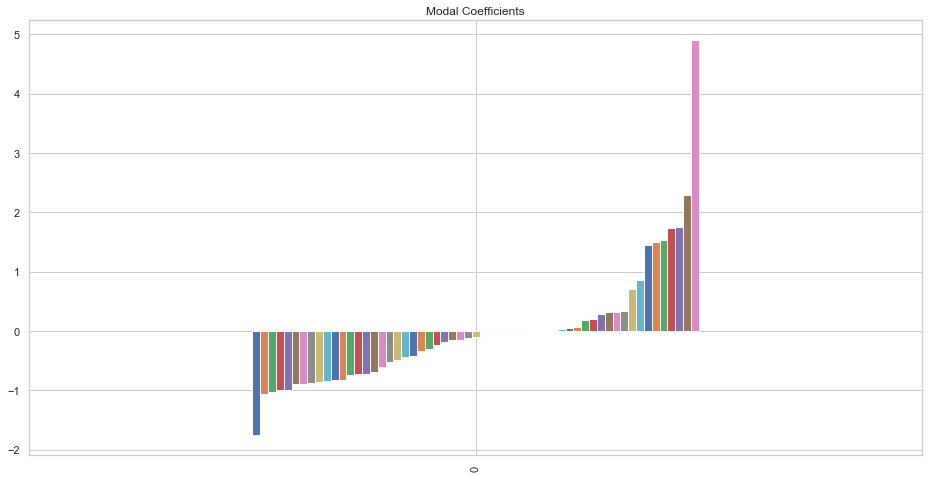

In [98]:
coef = pd.DataFrame(data=lm.coef_ ).T
coef.columns = selected_columns

model_coef = coef.T.sort_values(by=0).T
model_coef.plot(kind='bar', title='Modal Coefficients', legend=False, figsize=(16,8),)

In [99]:
## training the model
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.01, normalize=False)

lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_pred = lasso.predict(X_test)

train_rmse = metrics.mean_absolute_error(y_train, y_train_pred)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Training Error: '+ str(train_rmse) )
print('Testing Error: '+ str(test_rmse) )


/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Training Error: 0.7270198940786987
Testing Error: 1.190813841958772


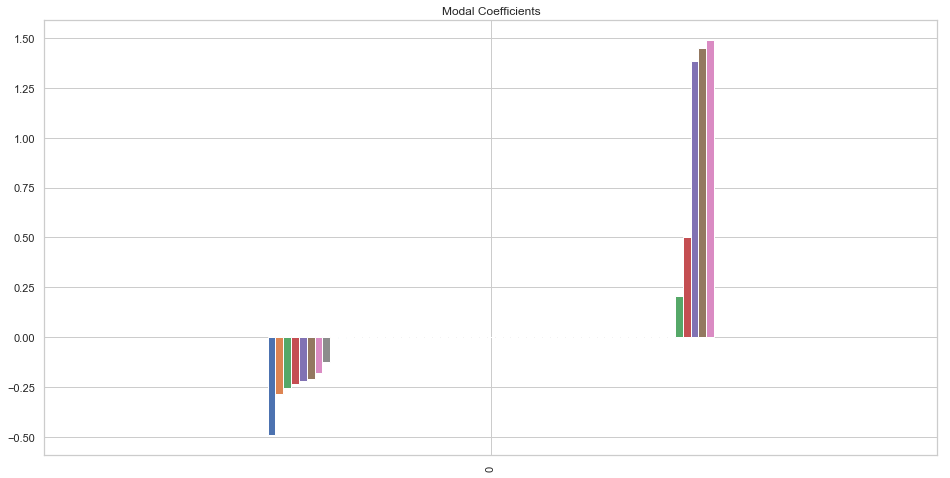

In [100]:
lasso_coef01 = pd.DataFrame(data=lasso.coef_).T
lasso_coef01.columns = X_train.columns
lasso_coef01 = lasso_coef01.T.sort_values(by=0).T
lasso_coef01.plot(kind='bar', title='Modal Coefficients', legend=False, figsize=(16,8))

In [101]:
lasso_coef01.T

,0
Wilderness_Area1,-0.491236
Soil_Type33,-0.285586
Soil_Type22,-0.252789
Soil_Type31,-0.233678
Soil_Type23,-0.221072
Soil_Type32,-0.206287
Soil_Type24,-0.178717
Elevation_Binned,-0.121934
Hillshade_3pm,-0.003077
Elevation,-0.000994


Training Error: 0.7665817639193105
Testing Error: 1.3263477893619346


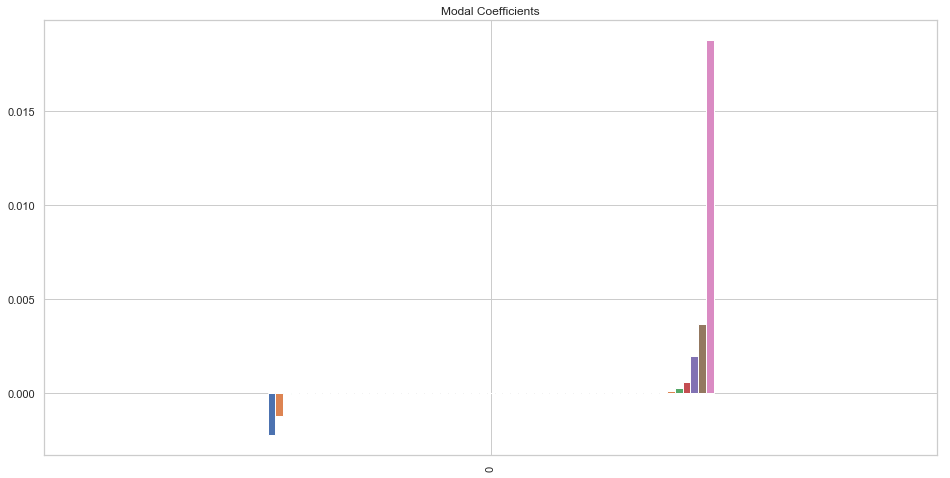

In [102]:
## training the model
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1, normalize=False)

lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_pred = lasso.predict(X_test)

train_rmse = metrics.mean_absolute_error(y_train, y_train_pred)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Training Error: '+ str(train_rmse) )
print('Testing Error: '+ str(test_rmse) )

lasso_coef01 = pd.DataFrame(data=lasso.coef_).T
lasso_coef01.columns = X_train.columns
lasso_coef01 = lasso_coef01.T.sort_values(by=0).T
lasso_coef01.plot(kind='bar', title='Modal Coefficients', legend=False, figsize=(16,8))

In [103]:
lasso_coef01.T

,0
Hillshade_3pm,-0.002266
Elevation,-0.001252
Horizontal_Distance_To_Fire_Points,-0.000050
Horizontal_Distance_To_Roadways,-0.000028
Soil_Type18,-0.000000
Soil_Type19,-0.000000
Soil_Type20,-0.000000
Soil_Type21,-0.000000
Soil_Type22,-0.000000
Soil_Type23,-0.000000


In [269]:
df.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40

## Train-Test Split

In [270]:
# Create matrix of features
X = df[['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1', 'Wilderness_Area4',
       'Soil_Type10', 'Soil_Type38', 'Soil_Type39', 'Cover_Type', 'Stony_Soil',
       'Acidity_Soil', 'Elevation_Binned']]

# Create target variable
y = df[['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1', 'Wilderness_Area4',
       'Soil_Type10', 'Soil_Type38', 'Soil_Type39', 'Cover_Type', 'Stony_Soil',
       'Acidity_Soil', 'Elevation_Binned']]

feature_cols = X.columns

In [271]:
# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(df, df, test_size=0.2, random_state=23)


In [272]:
X_train.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type,Stony_Soil,Acidity_Soil,Elevation_Binned,Hillshade_9am_Squared,Hillshade_Noon_Squared,Hillshade_3pm_Squared,log_Elevation,Hillshade_mean,Fire_Point_Binned
count,464809.000000,464809.000000,464809.000000,464809.000000,464809.000000,464809.000000,464809.000000,464809.000000,464809.000000,464809.000000,464809.000000,464809.000000,464809.000000,464809.000000,464809.000000,464809.000000,464809.000000,464809.000000,464809.000000,464809.000000,464809.000000,464809.000000,464809.000000,464809.000000,464809.000000,464809.000000,464809.000000,464809.000000,464809.000000,464809.000000,464809.000000,464809.000000,464809.000000,464809.000000,464809.000000,464809.000000,464809.000000,464809.000000,464809.000000,464809.000000,464809.000000,464809.000000,464809.000000,464809.000000,464809.000000,464809.000000,464809.000000,464809.000000,464809.000000,464809.000000,464809.000000,464809.000000,464809.000000,464809.000000,464809.000000,464809.000000,464809.000000,464809.000000,464809.000000,464809.000000,464809.000000,464809.000000,464809.000000,464809.000000
mean,2959.232977,155.471764,14.104400,269.325757,46.388618,2349.968639,212.137908,223.292591,142.511842,1981.033452,0.449299,0.051365,0.435762,0.063575,0.005215,0.012997,0.008371,0.021125,0.002805,0.011327,0.000189,0.000286,0.001981,0.055965,0.021508,0.051821,0.029943,0.001022,0.000006,0.004851,0.005901,0.003249,0.006915,0.015817,0.001429,0.057363,0.099361,0.036774,0.000802,0.004583,0.001906,0.001620,0.198654,0.051787,0.044145,0.090512,0.077514,0.002732,0.003234,0.000211,0.000512,0.026594,0.023797,0.015174,2.049954,2.631667,0.937860,2.239733,45719.387101,50250.831959,21774.867606,7.987885,192.647447,1.302929
std,280.049762,111.923844,7.492297,212.339058,58.257440,1559.421920,26.774923,19.780079,38.278525,1323.580503,0.497423,0.220742,0.495857,0.243994,0.072027,0.113260,0.091110,0.143801,0.052892,0.105825,0.013758,0.016913,0.044470,0.229854,0.145070,0.221666,0.170432,0.031951,0.002541,0.069483,0.076593,0.056904,0.082867,0.124768,0.037769,0.232536,0.299147,0.188207,0.028317,0.067539,0.043618,0.040217,0.398987,0.221597,0.205417,0.286915,0.267405,0.052200,0.056773,0.014519,0.022622,0.160893,0.152416,0.122245,1.394017,1.726286,0.627625,0.755602,10572.519806,8445.730034,10741.098080,0.099844,14.474337,1.331500
min,1859.000000,0.000000,0.000000,0.000000,-166.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,7.527794,31.666667,-1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1025.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000

### Downsampling

In [273]:
# separate minority and majority classes
spruce_fir_X = X_train[X_train.Cover_Type ==1]
spruce_fir_y = y_train[y_train.Cover_Type ==1]
lodgepole_pine_X = X_train[X_train.Cover_Type ==2]
lodgepole_pine_y = y_train[y_train.Cover_Type ==2]
ponderosa_pine_X = X_train[X_train.Cover_Type ==3]
ponderosa_pine_y = y_train[y_train.Cover_Type ==3]
cottonwood_willow_X = X_train[X_train.Cover_Type ==4]
cottonwood_willow_y = y_train[y_train.Cover_Type ==4]
aspen_X = X_train[X_train.Cover_Type ==5]
aspen_y = y_train[y_train.Cover_Type ==5]
douglas_fir_X = X_train[X_train.Cover_Type ==6]
douglas_fir_y = y_train[y_train.Cover_Type ==6]
krummholz_X = X_train[X_train.Cover_Type ==7]
krummholz_y = y_train[y_train.Cover_Type ==7]

In [274]:
# downsample spruce/fir
sprucefir_downsampled_X = resample(spruce_fir_X, 
                                replace = False, # sample without replacement
                                n_samples = len(cottonwood_willow), # match minority n
                                random_state = 23) # reproducible results

sprucefir_downsampled_y = resample(spruce_fir_y, 
                                replace = False, # sample without replacement
                                n_samples = len(cottonwood_willow), # match minority n
                                random_state = 23) # reproducible results


In [275]:
# downsample lodgepole pine
lodgepolepine_downsampled_X = resample(lodgepole_pine_X, 
                                replace = False, # sample without replacement
                                n_samples = len(cottonwood_willow), # match minority n
                                random_state = 23) # reproducible results

lodgepolepine_downsampled_y = resample(lodgepole_pine_y, 
                                replace = False, # sample without replacement
                                n_samples = len(cottonwood_willow), # match minority n
                                random_state = 23) # reproducible results



In [276]:
# downsample ponderosa pine
ponderosapine_downsampled_X = resample(ponderosa_pine_X, 
                                replace = False, # sample without replacement
                                n_samples = len(cottonwood_willow), # match minority n
                                random_state = 23) # reproducible results

ponderosapine_downsampled_y = resample(ponderosa_pine_y, 
                                replace = False, # sample without replacement
                                n_samples = len(cottonwood_willow), # match minority n
                                random_state = 23) # reproducible results




In [277]:
# downsample aspen
aspen_downsampled_X = resample(aspen_X, 
                                replace = False, # sample without replacement
                                n_samples = len(cottonwood_willow), # match minority n
                                random_state = 23) # reproducible results

aspen_downsampled_y = resample(aspen_y, 
                                replace = False, # sample without replacement
                                n_samples = len(cottonwood_willow), # match minority n
                                random_state = 23) # reproducible results




In [278]:
# downsample douglas fir
douglasfir_downsampled_X = resample(douglas_fir_X, 
                                replace = False, # sample without replacement
                                n_samples = len(cottonwood_willow), # match minority n
                                random_state = 23) # reproducible results

douglasfir_downsampled_y = resample(douglas_fir_y, 
                                replace = False, # sample without replacement
                                n_samples = len(cottonwood_willow), # match minority n
                                random_state = 23) # reproducible results




In [279]:
# downsample spruce/fir
krummholz_downsampled_X = resample(krummholz_X, 
                                replace = False, # sample without replacement
                                n_samples = len(cottonwood_willow), # match minority n
                                random_state = 23) # reproducible results


krummholz_downsampled_y = resample(krummholz_y, 
                                replace = False, # sample without replacement
                                n_samples = len(cottonwood_willow), # match minority n
                                random_state = 23) # reproducible results



In [280]:
# Combine minority class with downsampled majority class
df_downsampled_X = pd.concat([sprucefir_downsampled_X, lodgepolepine_downsampled_X, ponderosapine_downsampled_X, aspen_downsampled_X, douglasfir_downsampled_X, krummholz_downsampled_X, cottonwood_willow_X])
 
df_downsampled_y = pd.concat([sprucefir_downsampled_y, lodgepolepine_downsampled_y, ponderosapine_downsampled_y, aspen_downsampled_y, douglasfir_downsampled_y, krummholz_downsampled_y, cottonwood_willow_y])
    

In [281]:
df_downsampled_X.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type,Stony_Soil,Acidity_Soil,Elevation_Binned,Hillshade_9am_Squared,Hillshade_Noon_Squared,Hillshade_3pm_Squared,log_Elevation,Hillshade_mean,Fire_Point_Binned
260855,2770,350,16,90,-29,85,190,212,159,684,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,3.0,1,2,36100,44944,25281,7.926603,187.000000,0
192784,3034,298,10,60,9,3406,191,236,186,283,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-1.0,-1,2,36481,55696,34596,8.017637,204.333333,0
185676,3046,315,6,277,24,2200,205,235,170,1328,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-1.0,1,2,42025,55225,28900,8.021585,203.333333,1
453227,3083,105,21,210,66,1348,250,208,76,1209,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,3.0,1,3,62500,43264,5776,8.033658,178.000000,1
7014,2948,54,13,497,-4,2067,227,211,114,2927,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-1.0,1,2,51529,44521,12996,7.988882,184.000000,2


In [282]:
df_downsampled_y.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type,Stony_Soil,Acidity_Soil,Elevation_Binned,Hillshade_9am_Squared,Hillshade_Noon_Squared,Hillshade_3pm_Squared,log_Elevation,Hillshade_mean,Fire_Point_Binned
260855,2770,350,16,90,-29,85,190,212,159,684,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,3.0,1,2,36100,44944,25281,7.926603,187.000000,0
192784,3034,298,10,60,9,3406,191,236,186,283,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-1.0,-1,2,36481,55696,34596,8.017637,204.333333,0
185676,3046,315,6,277,24,2200,205,235,170,1328,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-1.0,1,2,42025,55225,28900,8.021585,203.333333,1
453227,3083,105,21,210,66,1348,250,208,76,1209,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,3.0,1,3,62500,43264,5776,8.033658,178.000000,1
7014,2948,54,13,497,-4,2067,227,211,114,2927,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-1.0,1,2,51529,44521,12996,7.988882,184.000000,2


In [283]:
# Create matrix of features
X_train = df_downsampled_X.drop('Cover_Type', axis=1)

y_train = df_downsampled_y['Cover_Type']

In [284]:
X_test = X_test.drop('Cover_Type', axis=1)

y_test = y_test['Cover_Type']

In [285]:
X_train.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Stony_Soil,Acidity_Soil,Elevation_Binned,Hillshade_9am_Squared,Hillshade_Noon_Squared,Hillshade_3pm_Squared,log_Elevation,Hillshade_mean,Fire_Point_Binned
count,18649.000000,18649.000000,18649.000000,18649.000000,18649.000000,18649.000000,18649.000000,18649.000000,18649.000000,18649.000000,18649.000000,18649.000000,18649.000000,18649.000000,18649.000000,18649.000000,18649.000000,18649.000000,18649.000000,18649.000000,18649.000000,18649.0,18649.000000,18649.000000,18649.000000,18649.000000,18649.000000,18649.000000,18649.000000,18649.000000,18649.000000,18649.000000,18649.000000,18649.000000,18649.000000,18649.000000,18649.000000,18649.000000,18649.000000,18649.000000,18649.000000,18649.000000,18649.000000,18649.000000,18649.000000,18649.000000,18649.000000,18649.00000,18649.000000,18649.000000,18649.000000,18649.000000,18649.000000,18649.000000,18649.000000,18649.000000,18649.000000,18649.000000,18649.000000,18649.000000,18649.000000,18649.000000,18649.000000
mean,2764.791249,156.699930,16.452732,230.276583,50.713711,1748.585018,212.443777,218.971956,135.459113,1547.918119,0.240871,0.034425,0.438200,0.286503,0.023594,0.041128,0.056142,0.054855,0.011422,0.043327,0.000054,0.0,0.000536,0.138184,0.026328,0.015979,0.035873,0.009330,0.000054,0.006810,0.039251,0.003700,0.003539,0.007668,0.000322,0.023379,0.051424,0.016248,0.000161,0.003110,0.001448,0.000536,0.088048,0.049761,0.021395,0.046919,0.043166,0.00177,0.007722,0.000268,0.001930,0.050887,0.045203,0.028527,2.997399,0.784868,1.753016,46068.043005,48471.195560,20457.725508,7.913313,188.958282,0.889163
std,413.500976,110.456666,8.455268,207.357717,60.833681,1346.804492,30.589782,22.858395,45.920227,1114.288899,0.427624,0.182324,0.496179,0.452139,0.151784,0.198592,0.230203,0.227704,0.106262,0.203597,0.007323,0.0,0.023151,0.345103,0.160115,0.125399,0.185979,0.096144,0.007323,0.082244,0.194198,0.060716,0.059386,0.087233,0.017935,0.151109,0.220866,0.126429,0.012683,0.055683,0.038023,0.023151,0.283372,0.217457,0.144702,0.211472,0.203236,0.04203,0.087535,0.016372,0.043895,0.219774,0.207756,0.166477,1.902212,1.000453,1.035885,12082.860834,9538.674347,12053.816238,0.151931,17.189602,1.110089
min,1871.000000,0.000000,0.000000,0.000000,-125.000000,0.000000,52.000000,90.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.000000,2704.000000,8100.000000,0.000000,7.534228,92.000000,-1.000000
25%,2404.000000,65.000000,10.000000,67.000000,5.000000,765.000000,196.000000,207.000000,107.000000,757.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.0

In [286]:
y_train.describe()

count    18649.000000
mean         4.000000
std          2.030917
min          1.000000
25%          2.000000
50%          4.000000
75%          6.000000
max          7.000000
Name: Cover_Type, dtype: float64

## Models


### XGBoost

In [287]:
xgb.XGBClassifier()

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [288]:
xg_clf = xgb.XGBClassifier(objective = "multi:softprob", 
                           colsample_bytree = 0.3,
                           num_class = 7,
                           eval_metric = "mlogloss",
                           learning_rate = 0.1,
                           alpha = 1, 
                           n_estimators = 100)

In [289]:
xg_clf

XGBClassifier(alpha=1, base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.3, eval_metric='mlogloss',
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, num_class=7, objective='multi:softprob',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=None, subsample=1, verbosity=1)

In [290]:
xg_clf.fit(X_train,y_train)

XGBClassifier(alpha=1, base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.3, eval_metric='mlogloss',
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, num_class=7, objective='multi:softprob',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=None, subsample=1, verbosity=1)

In [291]:
preds = xg_clf.predict(X_test)


test_f1 = f1_score(y_test, preds, average='macro')
test_acc = accuracy_score(y_test, preds)

print("Accuracy: %f" % (test_acc))
print("F1: %f" % (test_f1))

Accuracy: 0.592644
F1: 0.534823


### KNN

In [235]:
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test) 

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/flatironschool/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int8, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
/Users/flatironschool/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int8, int64, float64 were all converted to float64 by StandardScaler.
  """


In [236]:
knn = KNeighborsClassifier(n_neighbors=1)

In [237]:
print(knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')


In [238]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [239]:
# make class predictions for the testing set
y_pred_class = knn.predict(X_test)

In [241]:
# calculate accuracy
from sklearn import metrics
print('Accuracy:' + str(metrics.accuracy_score(y_test, y_pred_class)))
print('F1: ' + str(metrics.f1_score(y_test, y_pred_class, average='macro')))



Accuracy:0.7134583444489385
F1: 0.6449253632610212


### Confusion Matrix

In [ ]:
import matplotlib.pyplot as plt
import itertools
import numpy as np
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = [10,5]
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred_class)
classes = ['Perished', 'Survived']
plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

### Logistic Regression

In [244]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)
logreg.fit(X_train, y_train)
df['Cover_Type'] = logreg.predict(X_train)

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


ValueError: Length of values does not match length of index

In [ ]:
logreg.coef_

In [ ]:
# class predictions (not predicted probabilities)
y_pred_class = logreg.predict(X_test)

In [ ]:
# calculate classification accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))


In [ ]:
# this works regardless of the number of classes
y_test.value_counts().head(7) / len(y_test)

### Random Forest

In [245]:
# Instantiate the classifier using 100 trees
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state = 23, n_estimators=100)
# 100 trees

In [246]:
#let's look at all the different default feature parameters
rfc

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=23, verbose=0, warm_start=False)

In [247]:
#fit the model to the training data
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=23, verbose=0, warm_start=False)

In [249]:
#use the fitted model to predict on the test data
rfc_pred = rfc.predict(X_test)



# checking accuracy on the test data
print('Test Accuracy score: ', accuracy_score(y_test, rfc_pred))


# checking accuracy on the test data
print('Test F1 score: ', f1_score(y_test, rfc_pred, average = 'macro'))

Test Accuracy score:  0.7535175511819833
Test F1 score:  0.6975160896958801


In [250]:
from sklearn.model_selection import GridSearchCV

In [251]:
#create a dictionary of all the parameters you want to tune
param_grid = { 
    'n_estimators': [100,200,300,400],
    'max_depth': [1,2,3,4],
    'criterion': ['gini', 'entropy'],
    'max_features': [0.1, 0.2, 0.25],
}

In [252]:
#create a grid search object and fit it to the data
# cv = cross validation

rfc = RandomForestClassifier(random_state=23)
CV_rfc = GridSearchCV(rfc, param_grid, cv=3,n_jobs=-1)
CV_rfc.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
### Identify the best params 
print(CV_rfc.best_params_)


#Identify the best score during fitting with cross-validation
# print(CV_rfc.best_estimator_.best_score_)


In [ ]:
#predict on the test set

rfc_pred = CV_rfc.best_estimator_.predict(X_test)

# checking accuracy
print('Test Accuracy score: ', accuracy_score(rfc_pred, y_test))


# checking accuracy
print('Test F1 score: ', f1_score(rfc_pred, y_test))

### Decision Tree

In [253]:
from sklearn.tree import DecisionTreeRegressor
tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=2)
tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=3)
tree_reg1.fit(X_train, y_train)
tree_reg2.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [266]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [267]:
# make class predictions for the testing set
y_pred_class = tree_clf.predict(X_test)

In [268]:
from sklearn import metrics
print('Accuracy:' + str(metrics.accuracy_score(y_test, y_pred_class)))
print('F1: ' + str(metrics.f1_score(y_test, y_pred_class, average='macro')))


Accuracy:0.06992074214951421
F1: 0.11857395763967335


/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
